<a href="https://colab.research.google.com/github/itsonlyvin/google-colab/blob/main/Medical_insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
from google.colab import files
files.upload()

Saving insurance.csv to insurance.csv


{'insurance.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,southwe

In [6]:
insurance_dataset=pd.read_csv('insurance.csv')
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
# First 5 rows of the Dataset
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# Number of rows and columns
insurance_dataset.shape

(1338, 7)

In [9]:
# Getting some Info about theDataSet
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# checking for mising values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# Statistical Measures of the DataSet
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


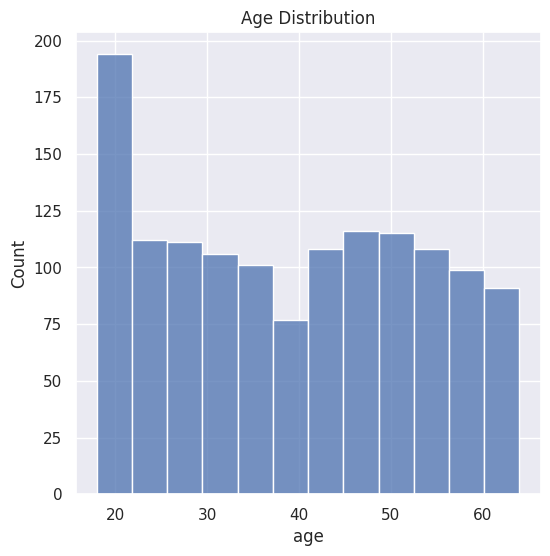

In [12]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

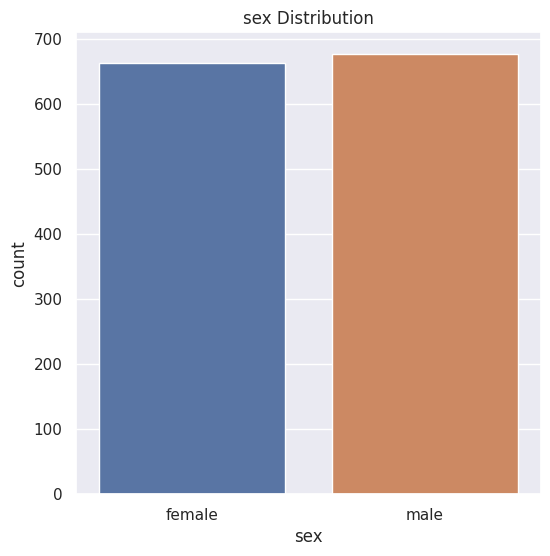

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'sex',data = insurance_dataset)
plt.title('sex Distribution')
plt.show()

In [14]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-15-eaa57d09fd92>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'],color="red")


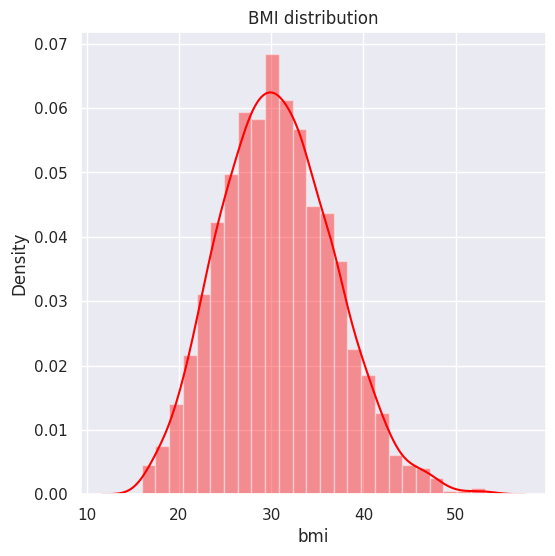

In [15]:
#BMI distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'],color="red")
plt.title('BMI distribution')
plt.show()

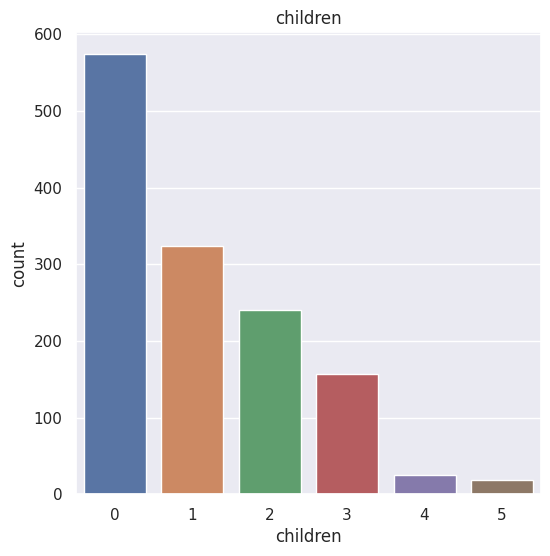

In [16]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('children')
plt.show()

In [17]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

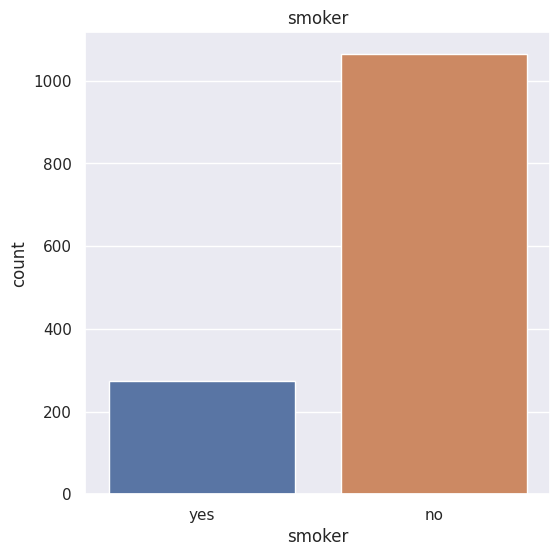

In [18]:
#smoker colums
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [19]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

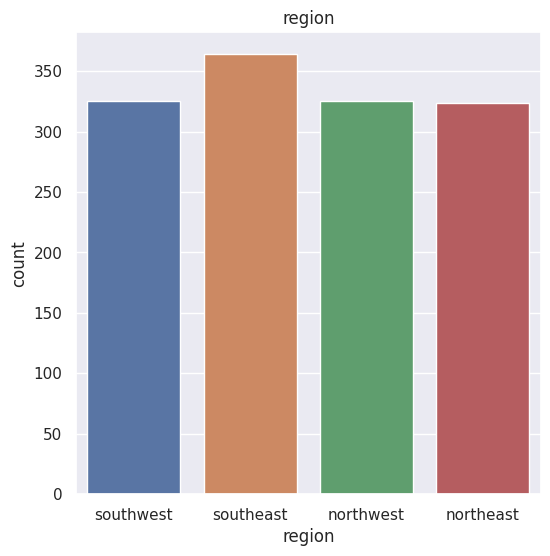

In [20]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [21]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

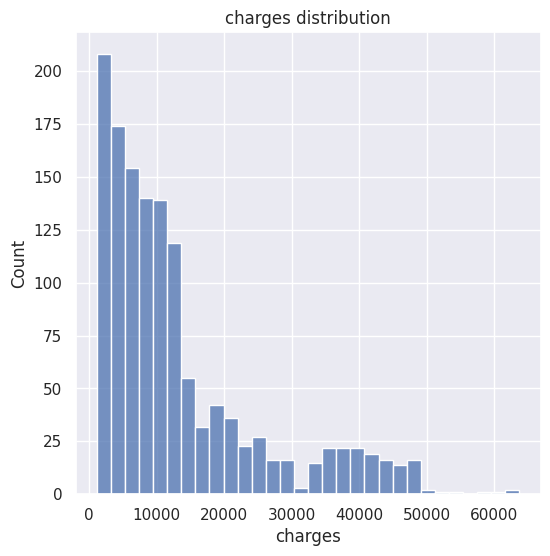

In [22]:
#distribution of charges value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['charges'])
plt.title('charges distribution')
plt.show()

Data preprocessing

Encoding the categorical features

In [23]:
#ENCODING SEX COLUMN
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

#ENCODING THE SMOKER COLUMN
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#ENCODING THE REGION COLUMN
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [24]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [25]:
X=insurance_dataset.drop(columns='charges', axis=1)
Y=insurance_dataset['charges']

In [26]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [27]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [28]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [30]:
#loading the linear regression model
model=LinearRegression()

In [31]:
model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [32]:
#prediction on traing data
training_data_prediction=model.predict(X_train)

In [33]:
#R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value:', r2_train)

R squared value: 0.751505643411174


In [34]:
#prediction on traing data
test_data_prediction=model.predict(X_test)

In [35]:
#R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value:', r2_test)#R squared value


R squared value: 0.7447273869684076


In [36]:
X_train.to_csv('insurance_train.csv', index=False)
#from google.colab import files
#files.download('insurance_train.csv')

In [37]:
input_data=(53,1,24.795,1,1,3)

#changing the input data into a numpy array
input_data_as_numpy_array=np.array(input_data)

#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

print('the insurance is USD', prediction[0])

[10195.47410328]
the insurance is USD 10195.474103276098


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
